In MergeSort, when the sizes of subarrays are small, the overhead of many recursive 
calls makes the algorithm inefficient. Therefore, in real use, we often combine 
MergeSort with InsertionSort to come up with a hybrid sorting algorithm for better 
efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. 
Once the size of a subarray in a recursive call of MergeSort is less than or equal to S, 
the algorithm will switch to InsertionSort, which is efficient for small input.

**Show your running program with printings of CPU time, and present your analysis**


**(a) Implement the above hybrid algorithm. Analyze its time complexity in terms of
the number of key comparisons with respect to S and the size of the input list 
n. Study how to determine an optimal value of S for best performance of this 
hybrid algorithm on different input cases and input sizes.** 

**(b) Implement the original version of MergeSort (as learnt in lecture). Compare its 
performance against the above hybrid algorithm in terms of the number of key 
comparisons and CPU time on different input cases and input sizes. You can 
use the optimal value of S obtained in (a) for this task.**

In [ ]:
#Libraries for measuring CPU time
from datetime import datetime 
from time import process_time
import timeit
import time
import random
import math
import numpy as np


from matplotlib import pyplot as plt


### **Sort Implementations**

In [ ]:
#Qns(b)
#Mergesort Function
def mergeSort(myList):
  #Instantiate key comparisons
  noComp = 0;
  totComp = 0;

  #Define length of list
  n = len(myList)

  #Define middle of list
  mid = n//2
  
  if mid<=0:
    #Nothing to compare
    return 0
  else:
    #Split list into 2 using middle
    leftList = myList[:mid]
    rightList = myList[mid:]

    #Sort left and right list
    totComp += mergeSort(leftList)
    totComp += mergeSort(rightList)

    #Initialise counter for main, left and right list
    mainCount = leftCount = rightCount = 0

    #Compare elements in seperated lists and merge into main list
    while leftCount < len(leftList) and rightCount < len(rightList):
      if leftList[leftCount] < rightList[rightCount]:
        myList[mainCount] = leftList[leftCount]
        leftCount += 1
      else:
        myList[mainCount] = rightList[rightCount]
        rightCount += 1

      #Add to key comparisons
      noComp += 1
      totComp += 1

      #Increment count for main list
      mainCount += 1

    #Check for remaining items in both lists
    while leftCount < len(leftList):
      myList[mainCount] = leftList[leftCount]
      leftCount += 1
      mainCount += 1
    
    while rightCount < len(rightList):
      myList[mainCount] = rightList[rightCount]
      rightCount += 1
      mainCount += 1
    
    #Print number of key comparisons for segment
    #print(myList, ", No. of Key Comparisons: ", noComp)

    return totComp 

In [ ]:
def insertionSort(myList):
  #Instantiate key comparisons
  totComp = 0

  #Define length of list
  n = len(myList)

  #Check if length of list is more than 1
  if n >= 1:
    for i in range(n):
      for j in range(i, 0, -1):
        #Increment key comparisons
        totComp += 1
        if myList[j] < myList[j-1]:
          #Swap items in list
          temp = myList[j]
          myList[j] = myList[j-1]
          myList[j-1] = temp
        else:
          break
    return totComp
  else:
    return 0

In [ ]:
arr = [6,3,8,4,5,8]
insertionSort(arr)

9

In [ ]:
# Qns(a)
#HybridSort Function
def mergeInsertHybrid(myList, S):
  #Copy old list
  #preList = myList[:]

  #Instantiate key comparisons
  noComp = 0;
  totComp = 0;

  #Define length of list
  n = len(myList)

  if n <= S:
    #Insertion Sort
    #Check if length of list is more than 1
    if n > 1:
      for i in range(n):
        for j in range(i, 0, -1):
          #Increment key comparisons
          noComp += 1
          totComp += 1
          if myList[j] < myList[j-1]:
            #Swap items in list
            temp = myList[j]
            myList[j] = myList[j-1]
            myList[j-1] = temp
          else:
            break
    else:
      #Nothing to compare
      return 0
  else:
    #Merge Sort
    #Define middle of list
    mid = n//2

    #Split list into 2 using middle
    leftList = myList[:mid]
    rightList = myList[mid:]

    #Sort left and right list
    totComp += mergeInsertHybrid(leftList, S)
    totComp += mergeInsertHybrid(rightList, S)

    #Initialise counter for main, left and right list
    mainCount = leftCount = rightCount = 0

    #Compare elements in seperated lists and merge into main list
    while leftCount < len(leftList) and rightCount < len(rightList):
      if leftList[leftCount] < rightList[rightCount]:
        myList[mainCount] = leftList[leftCount]
        leftCount += 1
      else:
        myList[mainCount] = rightList[rightCount]
        rightCount += 1

      #Increment key comparisons
      noComp += 1
      totComp += 1

      #Increment count for main list
      mainCount += 1

    #Check for remaining items in both lists
    while leftCount < len(leftList):
      myList[mainCount] = leftList[leftCount]
      leftCount += 1
      mainCount += 1
    
    while rightCount < len(rightList):
      myList[mainCount] = rightList[rightCount]
      rightCount += 1
      mainCount += 1
    
    #Print number of key comparisons for segment
  #print("Pre: ", preList, "\nPost: ", myList, "\nNo. of Key Comparisons: ", noComp)
  return totComp 
  

### **Finding Optimal S Value**

In [ ]:
#Generate random list
#Random Test Cases
# sizeMin = Array min Size
# sizeMax = Array max Size
# caseMax = Value in array max range
def RandomInputCases(sizeMin, sizeMax, caseMax):
  listsize = random.randint(sizeMin, sizeMax)
  randomList = []
  for i in range(listsize):
    randomList.append(random.randint(0,caseMax))

  #print(randomList)
  return randomList

def PointOfInterest(x1, x2, y1, y2):
  if ( (abs(x1 - x2)) <= 0.002 and (abs(y1 - y2)) <= 0.002):
    return True
def isMinimal(v1,v2):
  if (v1 < v2):
    return True


In [ ]:
#hybrid (T/F) = Using hybrid or merge
#ListData = data to sort
#S = value for hybrid to swap
#display = show results   
def CPUTimeDisplay(sortType, ListData, S, display, KeyComp = False):
    sortTypes = {'I': "Insertion",
               'H': "Hybrid",
               'M': "Merge"}
    #print("Before: ", ListData)   

    #REAL TIME
    start_time = datetime.now() 
    s = time.time()
    s1 = time.perf_counter()
    s2 = timeit.default_timer()
    #PROCESS TIME
    start = process_time()

    if (sortType == 'H'):
      totComp = mergeInsertHybrid(ListData,S)
      #mergeInsertHybrid(ListData,S)
    elif (sortType == 'I'):
      totComp = insertionSort(ListData)
    else:
      totComp = mergeSort(ListData)
      #mergeSort(ListData)
    
    if (KeyComp):
      return totComp
    
    #STOP TIME
    stop_time = datetime.now()
    sp = time.time()
    sp1 = time.perf_counter()
    sp2 = timeit.default_timer()
    stop = process_time()

    runtime = (stop - start) * 1000

    #print("After: ", ListData)
    
    if display:
      #Elapsed Time (Real-time)
      print("Array Size: ", len(ListData))
      print("\nTotal Key Comparisons", "[", sortTypes[sortType],"]", ": ", totComp)
      #print('CPU Runtime [Datetime] (hh:mm:ss.ms) {}'.format(stop_time - start_time))
      #print('CPU Runtime [PerfCounter]: ', sp1 - s1)
      #print('CPU Runtime [Timeit.DefaultTimer]:', sp2 - s2 )
      #print("CPU Runtime [Time.time] Runtime: ", sp - s)
      #Process Time (Computing time)
      print(ListData)
      print('CPU Runtime [ProcessTime]: ', runtime, " ms")

    return runtime


In [ ]:
#Generating Data
def generateTestResult(testType, sortType1, sortType2, sizeMin, sizeMax, caseMax, S, noIterations, sampleSize = 1, randomG = False, display = False , smooth = 10, keyComp = False, intersect = True, gtype = "line", sortType3 = '', step = 1, figX = 0, figY = 0, noIncrement = False, minimum = False):
  #Various Data generation Parameters
  sortTypes = {'I': "Insertion",
               'H': "Hybrid",
               'M': "Merge"}

  xaxis = {'A': "Array Size", 
           'S': "S", 
           'N': "No. of Iterations"}
  
  yaxis = ["Key Comparison", "Time (ms)"]

  #SValues and start/end of loop
  indexS = 0
  indexE = 0
  SvalueUsed = S

  #Set the start/end of loop according to various type of test
  if (testType == 'A'):
    if (noIncrement):
      indexE = noIterations
    else:
      indexS = 2
      indexE = sizeMax + 1
  elif (testType == 'S'):
    indexS = 2
    indexE = S
  else:
    indexE = noIterations

  #Initialising Array for storing Data
  sampleData = []
  dataToSample = []
  arraySizes = []

  sort1RunTime = []
  sort2RunTime = []
  sort3RunTime = []
  intersectX = []
  intersectY = []
  xdata = []

  sampleSort1RunTime = []
  sampleSort2RunTime = []
  sampleSort3RunTime = []
  sampleSizes = []
  sampleIntersectX = []
  sampleIntersectY = []

  minimalCPUTime1 = 0
  minimalCPUTime2 = 0
  minimalCPUTime3 = 0

  #Creating Samples based on sample size
  for k in range(sampleSize):

    #Storing generated data if required
    if (testType == 'A'):
      if (not randomG):
        sampleData.append(RandomInputCases(sizeMin, sizeMax, caseMax))
    else:
      if (testType == 'S'):
        sampleData.append(RandomInputCases(sizeMin, sizeMax, caseMax))
        arraySizes.append(len(sampleData[k]))
      else:
        randomSize = random.randint(sizeMin, sizeMax)
        arraySizes.append(randomSize)

    #Testing data for key comparisons and computing time
    for i in range(indexS, indexE, step):

      if (testType == 'A'):
        if (randomG):
          dataToSample = RandomInputCases(i, i, caseMax)
        else:
          dataToSample = (sampleData[k].copy())[:i]
        
        if (noIncrement):
          dataToSample = RandomInputCases(sizeMin, sizeMax, caseMax)
      elif (testType == 'S'):
        dataToSample = (sampleData[k].copy())
        SvalueUsed = i
      else:
        dataToSample = RandomInputCases(randomSize, randomSize, caseMax)

      #Minimising the anomaly present from CPU Execution by using the minimal time required for the process to complete after several runs
      for j in range(smooth):

        cpuTime1 = CPUTimeDisplay(sortType1, dataToSample.copy(), SvalueUsed, display, keyComp)
        cpuTime2 = CPUTimeDisplay(sortType2, dataToSample.copy(), SvalueUsed, display, keyComp)
        if (sortType3 != ''):
          cpuTime3 = CPUTimeDisplay(sortType3, dataToSample.copy(), SvalueUsed, display, keyComp)
          if (minimalCPUTime3 == 0 or isMinimal(cpuTime3, minimalCPUTime3) ):
            minimalCPUTime3 = cpuTime3 
        if (minimalCPUTime1 == 0 or isMinimal(cpuTime1, minimalCPUTime1) ):
          minimalCPUTime1 = cpuTime1
        if (minimalCPUTime2 == 0 or isMinimal(cpuTime2, minimalCPUTime2) ):
          minimalCPUTime2 = cpuTime2 
        
      sort1RunTime.append(minimalCPUTime1)
      sort2RunTime.append(minimalCPUTime2)
      if (sortType3 != ''):
        sort3RunTime.append(minimalCPUTime3)
        minimalCPUTime3 = 0
      #Finding intersection points
      if (intersect):
        if (PointOfInterest(i,i, minimalCPUTime1, minimalCPUTime2)):
          intersectX.append(i)
          intersectY.append(minimalCPUTime2)

      minimalCPUTime1 = 0
      minimalCPUTime2 = 0
      if (noIncrement):
        xdata.append(len(dataToSample))  
      else:
        xdata.append(i)
    
    #Finding the minimum point
    if (minimum):
      if (sortType1 == 'H'):
        intersectY.append(min(sort1RunTime))  
        intersectX.append(sort1RunTime.index(min(sort1RunTime)))       
      elif (sortType2 == 'H'):
        intersectY.append(min(sort2RunTime))
        intersectX.append(sort2RunTime.index(min(sort2RunTime)))       

    #Save Data
    sampleSort1RunTime.append(sort1RunTime)
    sampleSort2RunTime.append(sort2RunTime)
    if (sortType3 != ''):
      sampleSort3RunTime.append(sort3RunTime)
    sampleSizes.append(xdata)
    if (intersect or minimum):
      sampleIntersectX.append(intersectX)
      sampleIntersectY.append(intersectY)

    #Reset Array
    sort1RunTime = []
    sort2RunTime = []
    if (sort3RunTime):
      sort3RunTime = []
    xdata = []
    if (intersect or minimum):
      intersectX = []
      intersectY = []
      
  #Setting parameters for generating Graph
  labelX = xaxis[testType]
  labelY = ""
  if (keyComp):
    labelY = yaxis[0]
  else:
    labelY = yaxis[1]
  
  sort3 = ""
  if (sortType3 != ''):
    sort3 = sortTypes[sortType3]

  generateGraph(gtype, sampleSize, sampleSizes, sampleSort1RunTime, sampleSort2RunTime, sampleSort3RunTime, sortTypes[sortType1], sortTypes[sortType2], sort3, labelX, labelY, arraySizes , sampleIntersectX ,sampleIntersectY, figX, figY)

#Generating Visualisation of Data
def generateGraph(graphType, sampleSize, xData, yData1, yData2, yData3, sortType1, sortType2, sortType3 , xGlabel, yGlabel, gTitle = [], intersectDataX = [], intersectDataY = [], figX = 0, figY = 0):
  maxY = 0
  sum = 0
  
  #For adjusting the ticks on the graph
  if (max(max(yData1)) > max(max(yData2))):
    maxY = max(max(yData1))
  else:
    maxY = max(max(yData2))
  if (yData3):
    if (maxY < max(max(yData3))):
      maxY = max(max(yData3))
  
  #Generating graph

  #Sample size 1
  if (sampleSize == 1):
    plt.figure(figsize=(15,10))
    if (figX != 0):
      plt.xticks(np.arange(0, max(max(xData))+1, figX))
    if (figY != 0):
      plt.yticks(np.arange(0, maxY, figY))

    if (graphType.lower() == "line"):
      plt.plot(xData[0], yData1[0], label= sortType1)
      plt.plot(xData[0], yData2[0], label= sortType2)
      if (yData3):
        plt.plot(xData[0], yData3[0], label= sortType3)

    else:
      plt.scatter(xData[0], yData1[0], label= sortType1)
      plt.scatter(xData[0], yData2[0], label= sortType2)
      if (yData3):
        plt.scatter(xData[0], yData3[0], label= sortType3)
    
    if (intersectDataX):
      plt.scatter(intersectDataX[0], intersectDataY[0], label= "Intersections", color='red') 

    if (gTitle):
      plt.title("Array Size: " + str(gTitle[0]))

    plt.xlabel(xGlabel)
    plt.ylabel(yGlabel)
    plt.legend()
  # Sample size 2
  elif (sampleSize == 2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    fig.suptitle('Horizontally stacked subplots')
    if (graphType.lower() == "line"):
      ax1.plot(xData[0], yData1[0], label= sortType1)
      ax1.plot(xData[0], yData2[0], label= sortType2)
      ax2.plot(xData[1], yData1[1], label= sortType1)
      ax2.plot(xData[1], yData2[1], label= sortType2)
      if (yData3):
        ax1.plot(xData[0], yData3[0], label= sortType3)
        ax2.plot(xData[1], yData3[1], label= sortType3)
      
    else:
      ax1.scatter(xData[0], yData1[0], label= sortType1)
      ax1.scatter(xData[0], yData2[0], label= sortType2)
      ax2.scatter(xData[1], yData1[1], label= sortType1)
      ax2.scatter(xData[1], yData2[1], label= sortType2)
      if (yData3):
        ax1.scatter(xData[0], yData3[0], label= sortType3)
        ax2.scatter(xData[1], yData3[1], label= sortType3)
    
    if (intersectDataX):
      ax1.scatter(intersectDataX[0], intersectDataY[0], label= "Intersections", color='red') 
      ax2.scatter(intersectDataX[1], intersectDataY[1], label= "Intersections", color='red')  

    if (gTitle):
        ax1.set_title("Array Size: " + str(gTitle[0]))
        ax2.set_title("Array Size: " + str(gTitle[1]))
    ax1.set(xlabel= xGlabel, ylabel= yGlabel)
    ax2.set(xlabel= xGlabel, ylabel= yGlabel)
    ax1.legend()
    ax2.legend()
  
  #Sample size more than 2
  else:
    fig, axs = plt.subplots(math.ceil(sampleSize/2), 2, figsize=(20,20)) 
    fig.tight_layout(pad=3.0)
    x = 0
    y = 0
    for i in range(sampleSize):
      if (graphType.lower() == "line"):
        axs[x, y].plot(xData[i], yData1[i], label= sortType1)
        axs[x, y].plot(xData[i], yData2[i], label= sortType2)
        if (yData3):
          axs[x, y].plot(xData[i], yData3[i], label= sortType3)
        
      else:
        axs[x, y].scatter(xData[i], yData1[i], label= sortType1)
        axs[x, y].scatter(xData[i], yData2[i], label= sortType2)
        if (yData3):
          axs[x, y].scatter(xData[i], yData3[i], label= sortType3)

      if (gTitle):
        axs[x, y].set_title("Array Size: " + str(gTitle[i]))
      
      if (intersectDataX):        
        if (len(intersectDataX[i]) == 1):
          axs[x, y].scatter(intersectDataX[i][0], intersectDataY[i][0], label= "Minimum", color='green') 
          coord = "( " + str(intersectDataX[i][0]) + " )"
          sum += intersectDataX[i][0]
          axs[x, y].annotate(coord, (intersectDataX[i][0], intersectDataY[i][0]), fontsize = 15)
        else:
          axs[x, y].scatter(intersectDataX[i], intersectDataY[i], label= "Intersections", color='red') 
      
      if (figX != 0):
        axs[x, y].xaxis.set_ticks(np.arange(0, max(max(xData))+1, figX))

      if (figY != 0):
        axs[x, y].xaxis.set_ticks(np.arange(0, maxY, figY))
      
      if ((i + 1) % 2 == 1):
        if (y == 1):
          y = 0
        else: 
          y += 1
      else:
        x += 1
        if (y == 1):
          y = 0
    for ax in axs.flat:
      ax.set(xlabel= xGlabel, ylabel= yGlabel)
      ax.legend()

  plt.show()

  #Calcuting the Optimal S Value by average of sample size
  if (sum != 0):
    print("Optimal S Value (Average): ", int(sum/sampleSize))


The graphs below represents the time taken for insertion/merge to complete sorting with array sizes from (2 - 200). From the graph below, we can infer that after around array size of below 50, insertion is much faster than Merge. Hence, we will proceed to generated another set of graph with array sizes of (2-50) to analyse it in-depth

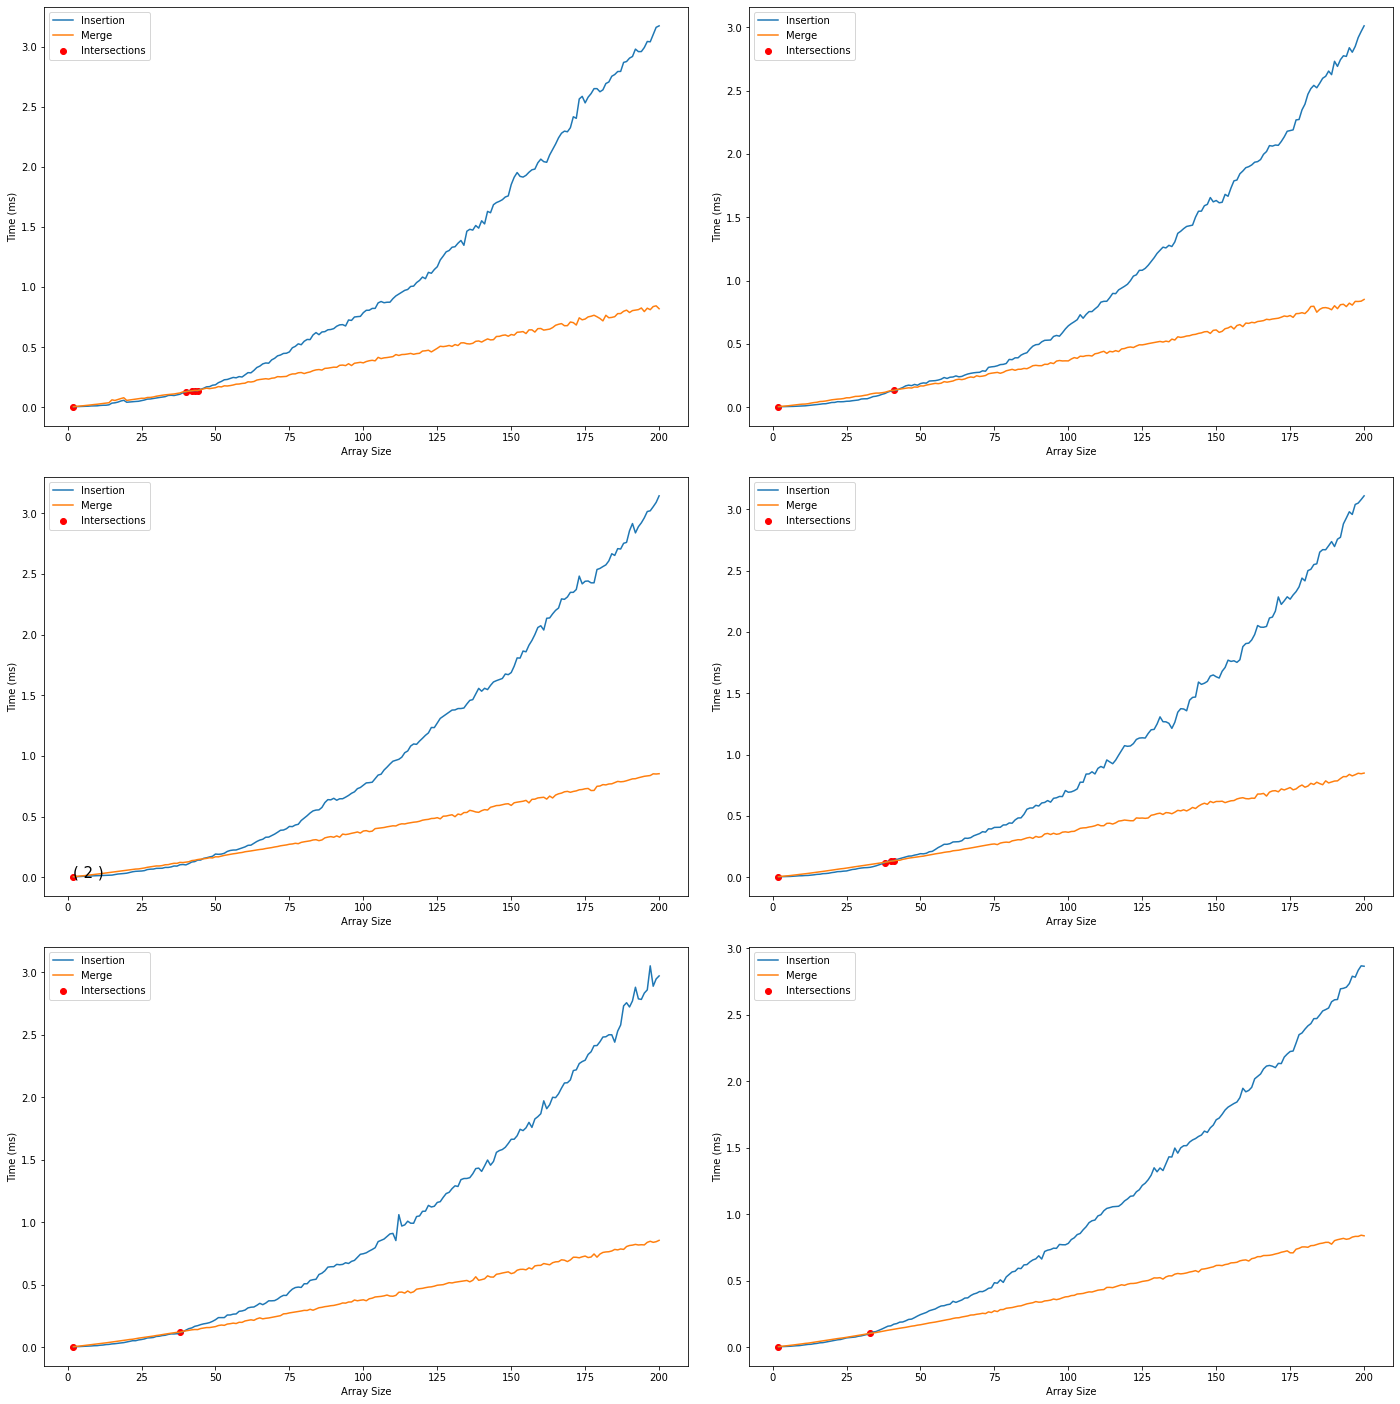

In [ ]:
generateTestResult('A', 'I', 'M', 200, 200, 1000, 0, 0, 6, False)

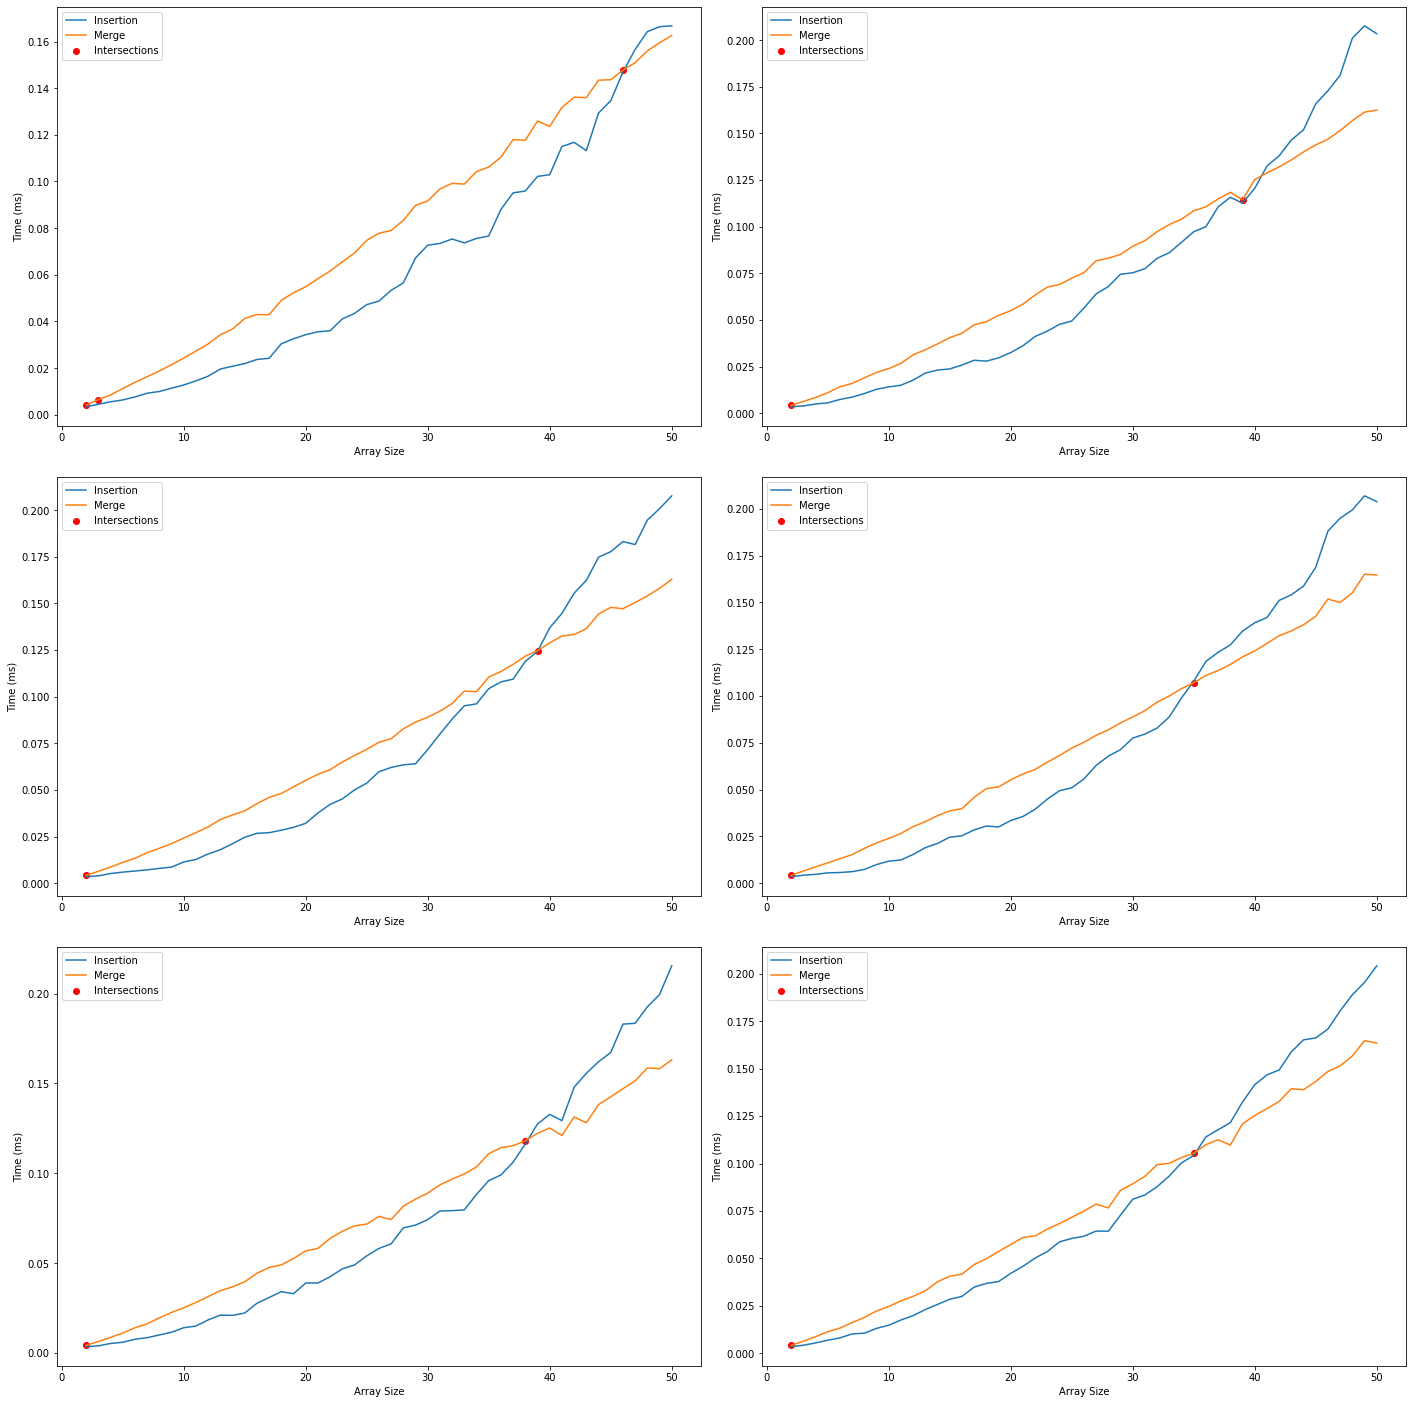

In [ ]:
generateTestResult('A', 'I', 'M', 50, 50, 1000, 0, 0, 6, False, smooth = 100)

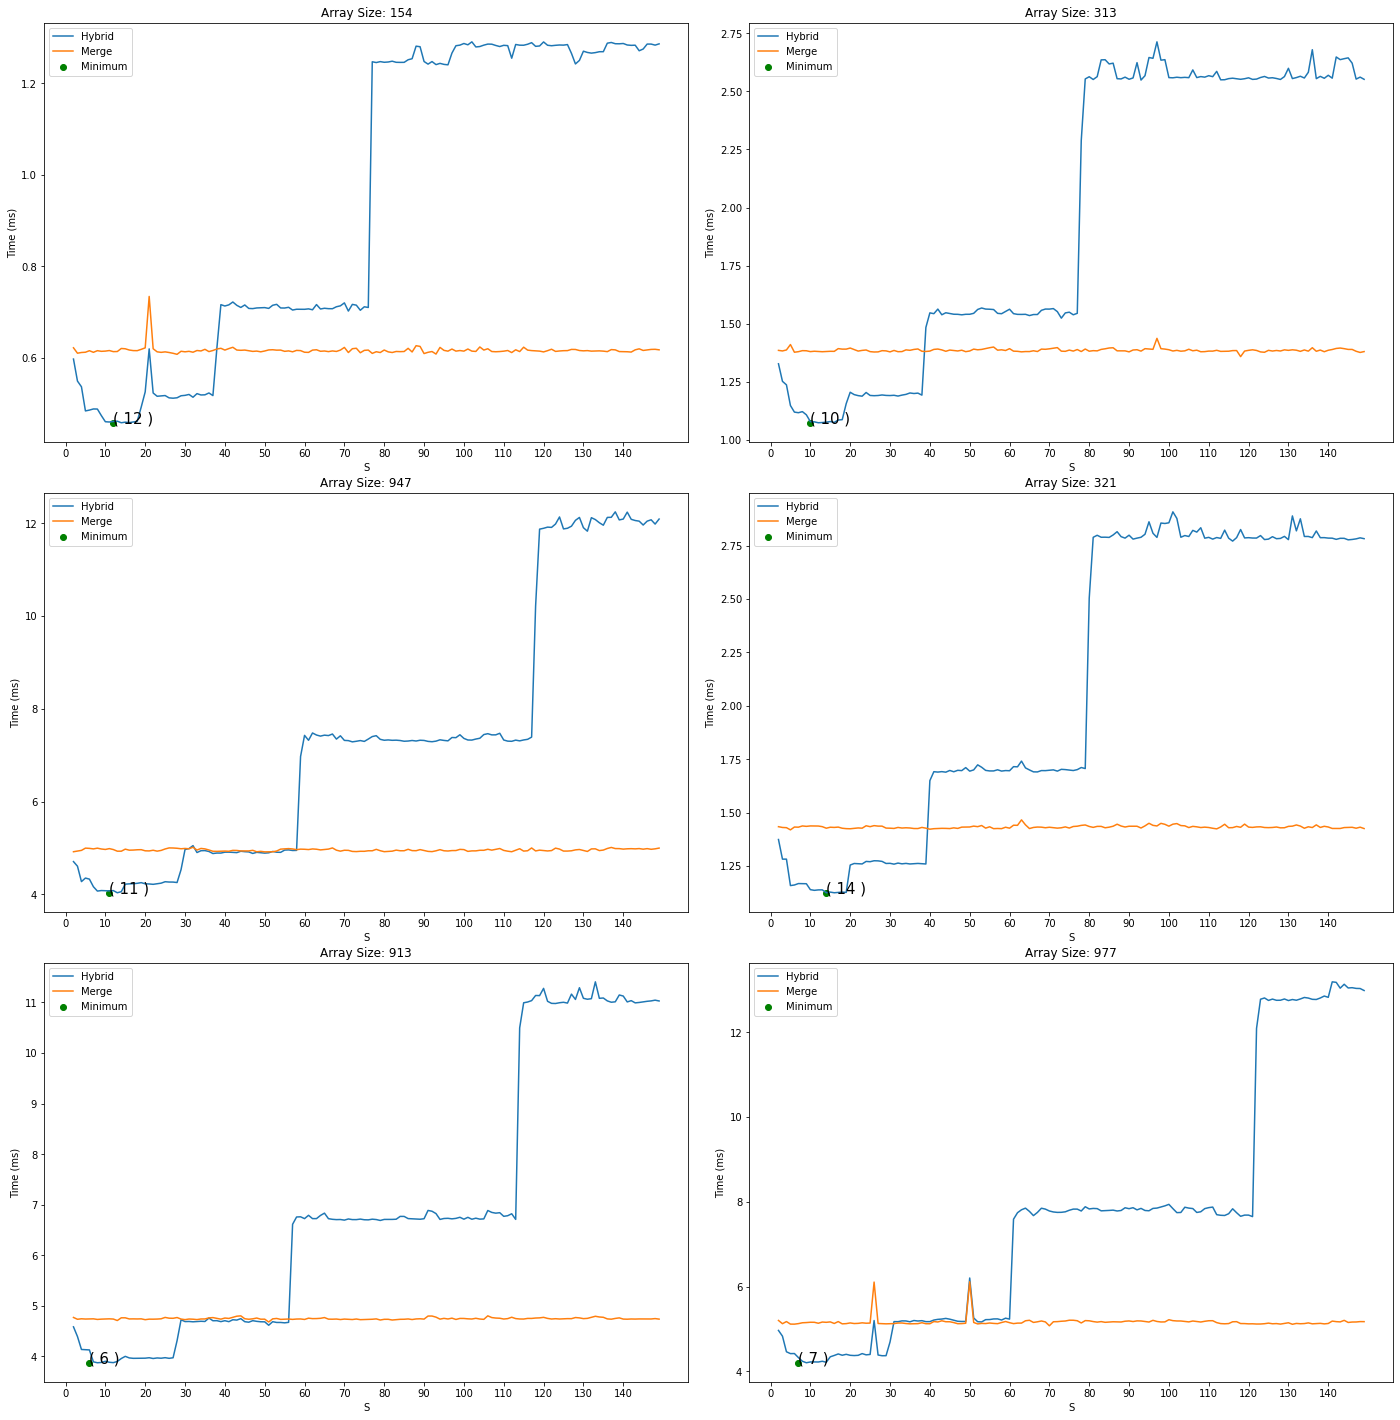

Optimal S Value (Average):  10


In [ ]:
generateTestResult('S', 'H', 'M', 100, 1000, 1000, 150, 0, 6, False, smooth = 20, figX = 10, intersect = False, minimum = True)

### **Comparison of hybrid and merge sort results & time complexity**

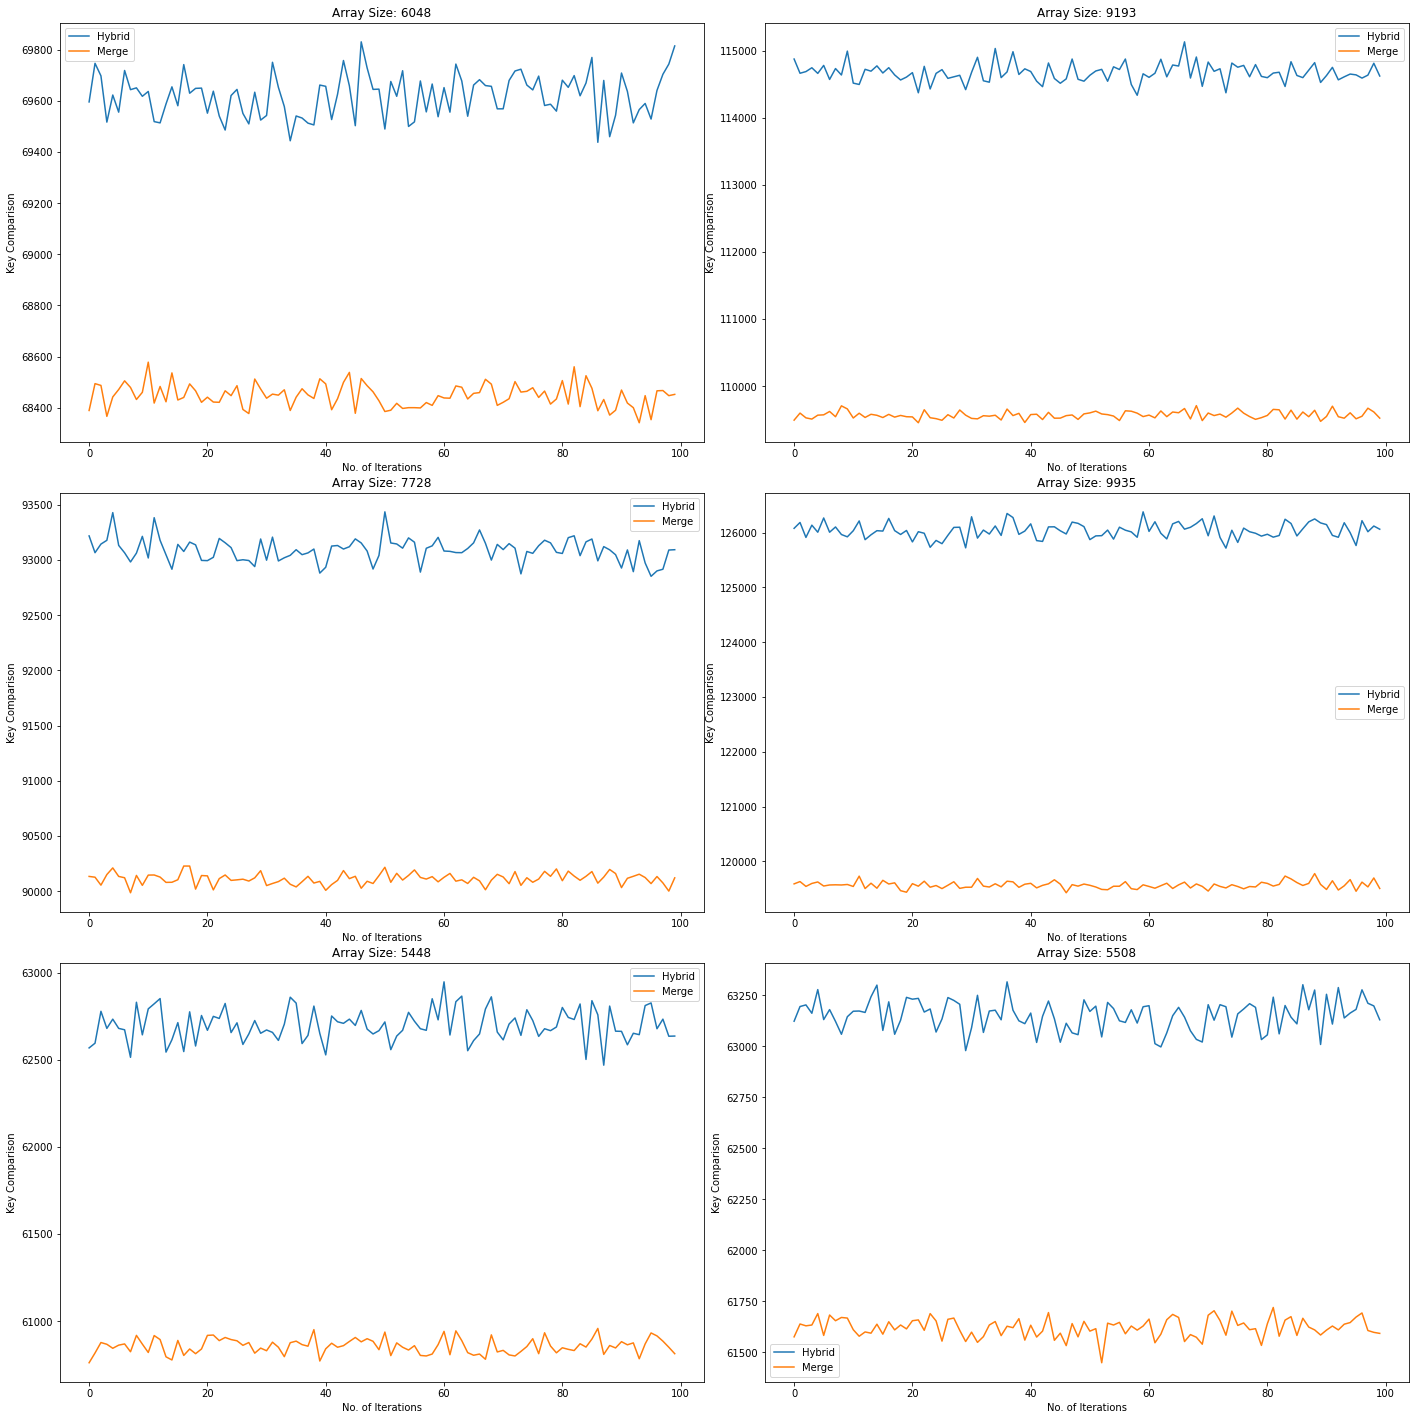

In [ ]:
generateTestResult('N', 'H', 'M', 5000, 10000, 1000, 10, 100, 6, keyComp = True, intersect = False)

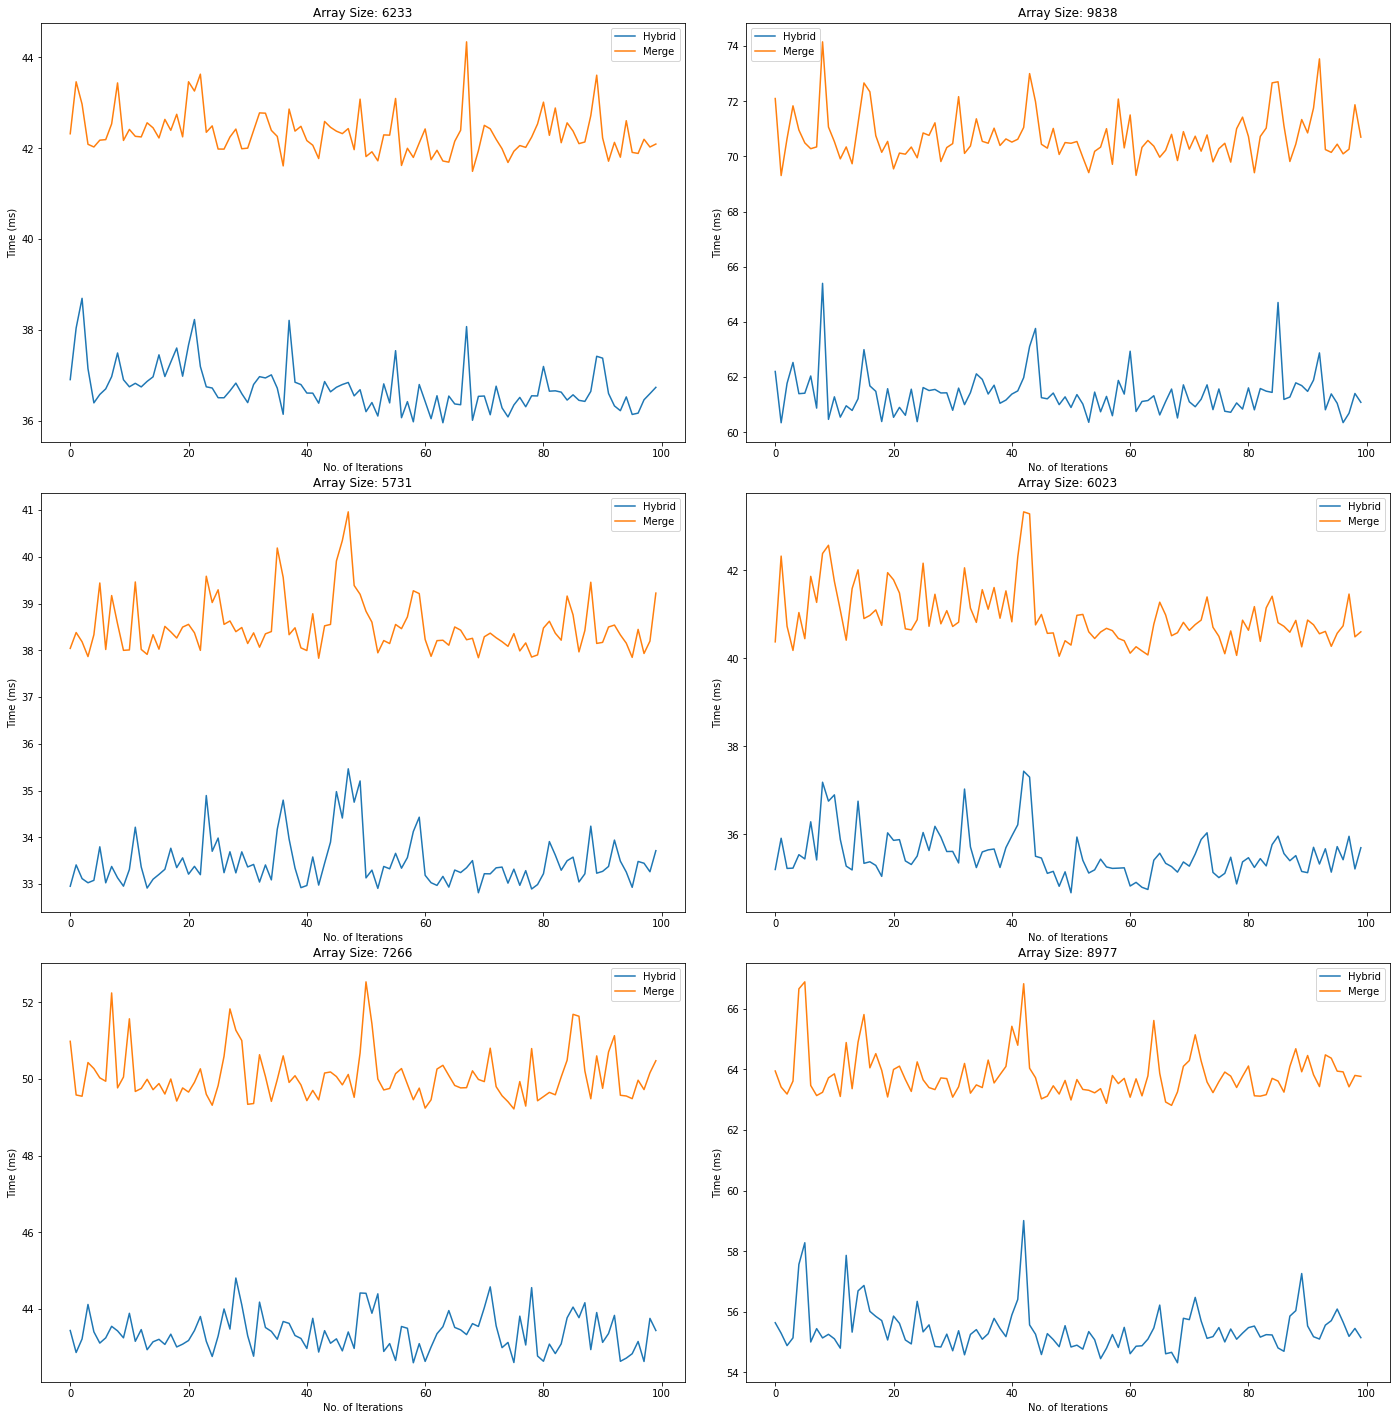

In [ ]:
generateTestResult('N', 'H', 'M', 5000, 10000, 1000, 10, 100, 6, intersect = False)

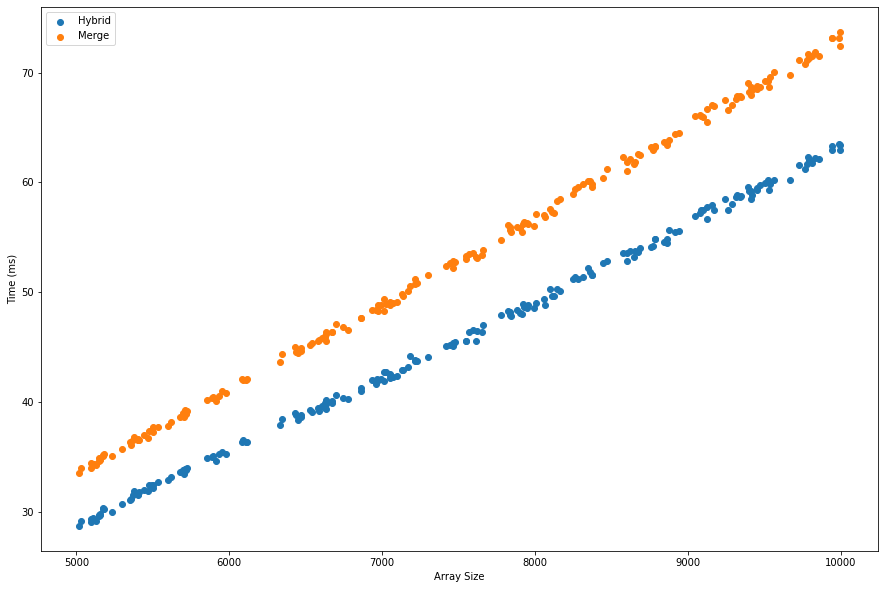

In [ ]:
generateTestResult('A', 'H', 'M', 5000, 10000, 10000, 10, 200, 1, True, gtype = "scatter", intersect = False, noIncrement = True)

**As seen in the graphs plotted above, the Hybrid sort is generally faster than the Mergesort even as the number of iterations increases.**

**Time complexity**

Best/Average/Worst case for MergeSort: O(n log n)

Best case for hybrid:
θ(n + n log (n/S))

Average/Worst case for hybrid:
θ(nS + n log (n/S))




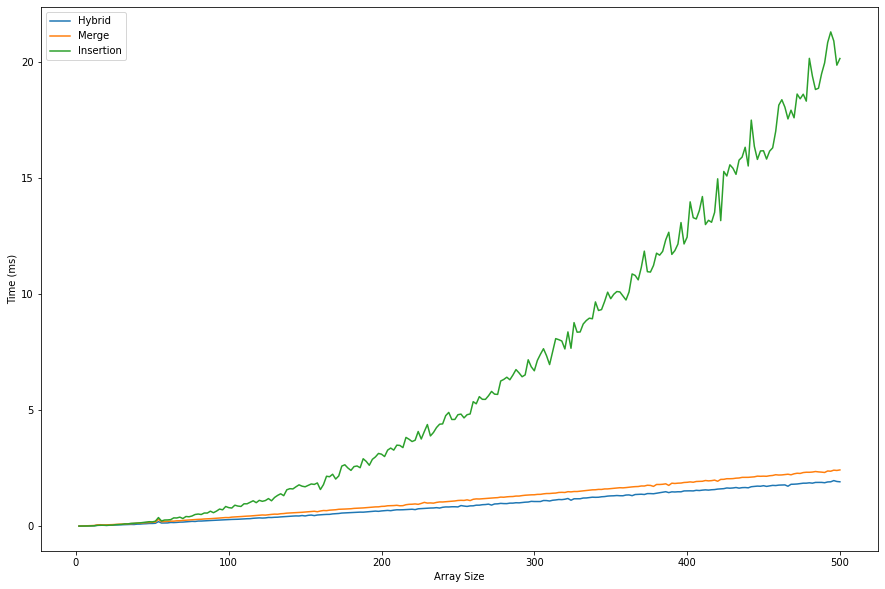

In [ ]:
 generateTestResult('A', 'H', 'M', 500, 500, 1000, 10, 512, 1, True, gtype = "line", intersect = False, smooth = 10, sortType3 = 'I', step = 2)